# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- The Smarcab doesn't move at all during the simulation.
- The driving agent is is getting negative or a positive rewards (from ~-6 to 3) depending of the green light status and the oncoming traffic.
- When the light turns red, the agent receives a positive reward (+1.04, +2.04, +2.79...) for being idled.  When the light turns green and there is no oncoming traffic, the agent receives a negative reward (= penalty, -4.65, -5.68, ...). The penalties are about twice higher in absolute value as the rewards.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- `agent.py` : 
    - flag `learning` in the `LearningAgent` class constructor ("`__init__`"): this flag defines whether or not the agent is expected to learn. If set to `True`, the agent will learn while driving. If set to `False`, the agent will drive without learning
    - flag `epsilon` in the `LearningAgent` class constructor ("`__init__`"): this flag defines the probability of choosing a random action when the agent is learning. `epsilon=0` will make the agent never take a random action and therefore never discover new possible actions. `epsilon=1` will make the agent always take a random action, negating all possible previous learning. 
    - flag `testing` in the `reset` method: this flag is used to define whether or not the agent is in test trials phase. The test trials are to be done after the trianing has been completed. When set to `True`, exploration factor `epsilon` and learning factor `alpha` are to be set to 0.

- `environment.py` : when an agent performs an action, the `act` function of the `Environment` class is called. For a given action, this function returns a rewards to the learning agent. 
- `simulator.py` : the `render_text()` function handle the display in the terminal prompt while the `render` function handle the display in the Graphical User Interface.
- `planner.py` : the `next_waypoint()` function first checks the current location of the agent. If the destination matchs this same location, no trial is required, the function returns `None`. Otherwise, the function checks if the destination is cardinally East or West. If the agent is heading to the opposite direction, the function checks whether the destination is North or South in order to define the optimal turn. In the special case where the destination is exactly on the same longitude as the agent's location, the function checks if the location is cardinally Norht or South. If the agent is heading to the opposite direction, the function checks weither the destination is East or West. However, because at this stage the function is always in the case where the destination is on the same longitude as the agent, the longitudinal difference `dx` is alwas 0. Hence, the function will always return a `right` action. 

        if dx < 0: # Destination also to the West
            return 'left'
        else:
            return 'right'

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


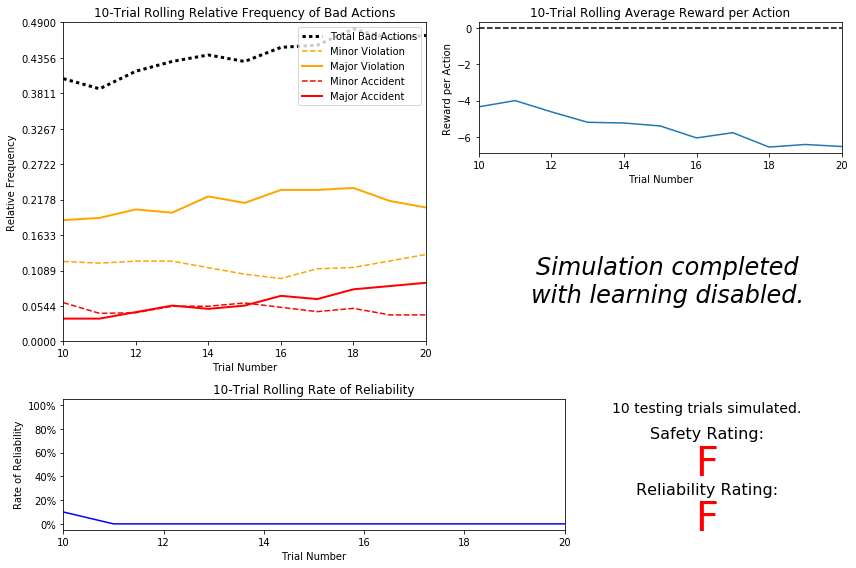

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
#vs.plot_trials('sim_no-learning.csv')

vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- According to the `10-Trial Rolling Relative Frequency of Bad Action` panel, the driving agend is making bad decisions 40 to 50% of the time. The average relative frequencies of accidents are 5.4% for minor and major accidents, which represent (5.4 + 5.4) / 45 = 25% = 1 out of 4 bad actions are causing accident 
- Giving that the agent drives randomly, is make sense to have a reliability rate of 0% (`10-Trial Rolling rate of Reliability` panel).
- According to the `10-Trial Rolling Average Reward per Action` panel, the agent is receiving mostly penalties (negative rewards). The avergae penalties goes from -4 to -6 which according to Q1 tends to the maximum possible penalty.
- As the number of trials increase, it seems that the number of critical accidents and the average reward per action get worst. However, because the driving is random, it is more likely that the first trials beeing 2less worst" than the others is due to luck. 
- the final Safety and Reliability ratings are both "F". The Smartcab would definitely not be considered safe nor reliable for its passengers. 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

- the features contained in `inputs` are most relevant for **safety**. Indeed, those features inform the agent about the immediate surroundings such as lights color and local traffic which are critical to avoid traffic rules violations and accidents. 
    - <span style="color:indigo">`light` : The color of the `light` is of course critical. According to the U.S regulation, no vehicle shall move if the `light` is `red` unless it intends to turn right, in which case the vehicle shall give way to other potential vehicles.</span>
    - <span style="color:indigo">`oncomimg` : the intended direction of the `oncoming` vehicle is specifically needed when the Smartcab intends to turn left at the intersection. Indeed, if an `oncoming` vehicle intending to go forward or turn right will have the right of way. If it intends to turn left (without corssing the Smartcab's trajectory) or if there is no vehicle, then the Smartcab can turn left safely.</span>
    - <span style="color:indigo">`left`: the intended direction of the `left` vehicle is specifically needed when the Smartcab intends turning right and the light is `red`. In this case, the `left` vehicle, if intending to go `forward`, has the right of way.</span> 
    - `right: `Assuming that other vehicles respects the traffic light, the `right` traffic can be neglected as its trajectory can never cross the Smartcab's one.

- the features `waypoint` and `deadline` are most relevant for **efficiency**. Those features inform the agent where to go in the most efficient way and how much time is left. 
    - <span style="color:indigo">`waypoint`</span>: the next `waypoint` inform the Smartcab about next direction leading to the closest to the destination.   
    - `deadline`: considering the `deadline`at the same level of importance as the **safety** could lead to dangerous behaviour. Therefore, because is better for passenger to arrive late and alive than die, the feature `deadline` will not be considered for leanring.  

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The features selected in ***Question 4*** have the following possible values
- waypoint : forward, left, right  
- light : green, red
- left : None, forward, left, right  

- oncoming : None, forward, left, right  

Just for information purpose, the `right` and `deadline` feature which is **not selected** have the following possible value:
- `right` : None, forward, left, right  
- `deadline` : None, all values from 5 to 70 (the world is 8x6, the biggest possible distance is 8+6=14. In the `reset` function from the `Environment` class, the deadline is defined as `deadline = distance * 5`. Hence the highest possible deadline is 14x5 = 70, the smallest possible deadline is 1x5 = 5).  <span style="color:indigo">Including this feature in the state would dramatically increase the total amount of possible states.</span>

The size of the state space using all features selected in ***Question 4*** is 3x2x4x4 = **96 combinations**. Assuming a trial is 7 steps on average, the combinations could be theoretically covered within 96/7 = 14 training trials. However each individual state has a probability P = 1/96 = 1.04% to occur, which make this "optimal" theoretical case undefinitely unlikely to happen.   

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

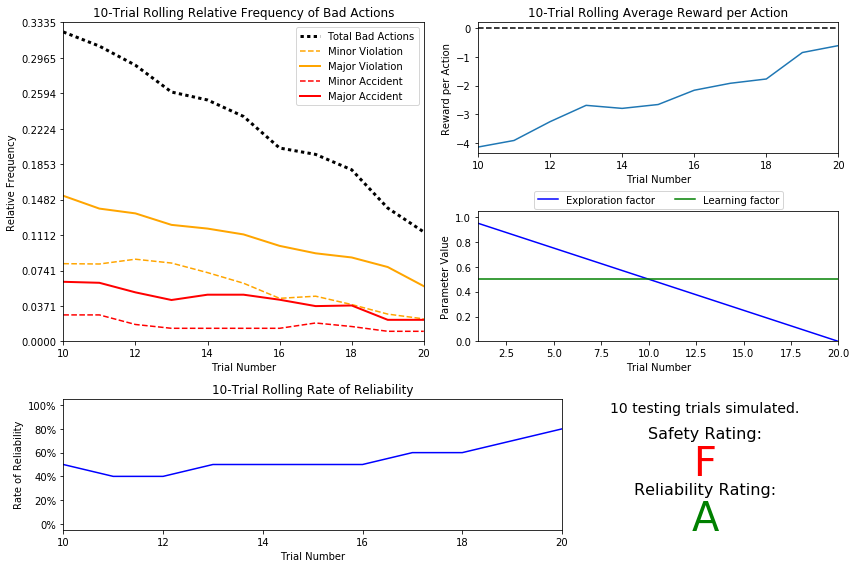

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- We observe a global improvement from the default Q-Learning agent compare to the basic driving agent.. 
- The driving agent made 20 training trials before testing. This is consistent with the amount of iterations required to reach $\epsilon$ < 0.05 (default threshold) with a decay of $\epsilon$ = $\epsilon$ - 0.05 per iteration, starting from $\epsilon$ = 1.
- The decaying function of $\epsilon$ is visible on the exploration/learning factor panel (blue line).
- as the number of training trials increased, the relative frequency of bad action significantly decreased from 33% to 14%. The average reward increased from about -4 to about 1. <span style="color:indigo">The reliability rating is significantly better and reached the "A" level. However, the safety rating stays at "F", indicating that the Smartcab still drives unsafely. This result is coherant with the bad action frequency evolution. Although it decreased, it didn't reached 0. The trend of the decrease suggest that some more training trials would make the line reach 0.</span>

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

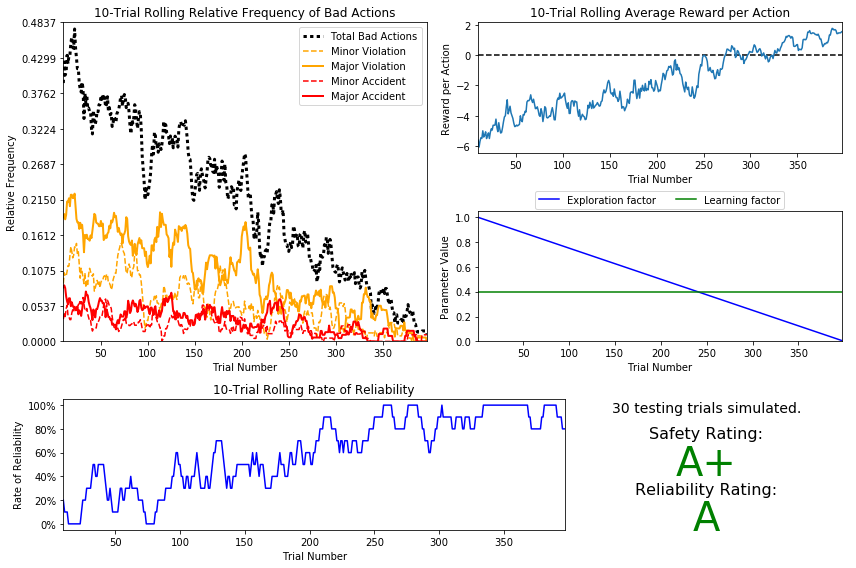

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- the decaying function used for epsilon is $$ \epsilon_{t+1} = \epsilon_{t} - 0.0025 $$
- 397 training trials were needed before begining testing
- epsilon-tolerance was set to 0.01 in order to allow the largest possible amount of training trials. the learning rate used was $\alpha$ = 0.4 in ordered to lightly favorise prior learnings. Tests show that a too large alpha tends to degrade the safety rating (prior learnings are being too heavily negated). An $\alpha$ decay following the equation below was tested without showing any particular improvement: $$ \alpha = \frac{\alpha_0}{e^{0.01t}} $$
- Based on this training, the smartcab obtain A+ for safety and A for reliability ratings.
- Yes, I'm very satisfied with the new safety and reliability ratings. Those ratings have been performed on a total of 30 test trials.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

### 1. optimal policy

*"Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment?"* 

- if the **light is red**
    - if the next waypoint is `Right`
        - if **no other vehicle is heading to agent's right**, optimal policy = `Right`
        - else optimal policy = `None`
    - else optimal policy = `None`
    
- if the **light is green**
    - if **there is no other vehicles around** (are all intended directions are `None`), optimal policy = next waypoint
    - else
        - if the next waypoint is `Right`, optimal policy = `Right` (agent has the right of way)

        - if the next waypoint is `Forward`, optimal policy = `Forward` (agent has the right of way)
        - if the next waypoint is `Left`
            - if the **vehicle forward turns to its right or goes forward**, optimal policy = `None` (yield)
            - else optimal policy = `Left` 

This optimal policy is implemented into a decision tree function `optimal_policy` here below.

In [8]:
def optimal_policy(state):
    
    waypoint,light,left,oncoming = state
    
    optimal_policy = None

    if light == 'red': # red light
        if (waypoint == 'right') and (left != 'forward'):
                optimal_policy = 'right'
        else:
            optimal_policy = 'None'
    else: # green light
        if waypoint == 'right':
            optimal_policy = 'right'
        elif waypoint == 'forward':
            optimal_policy = 'forward'
        elif waypoint == 'left':
            if oncoming in ['right', 'forward']:
                optimal_policy = 'None'
            else:
                optimal_policy = 'left'

    # insure that an optimal policy has been assigned to the state
    assert(optimal_policy is not None, "no optimal policy assigned to the state {}".format(state))

    return optimal_policy

<ipython-input-8-e9a4ccd845c5>:24: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(optimal_policy is not None, "no optimal policy assigned to the state {}".format(state))


### 2.  `sim_improved-learning.txt`

*"For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state ? Are there any states where the policy is different than what would be expected from an optimal policy?"*

The comparison here below show that about **85.4% of the policies learned by the Q-learning agent  match the expected optimal policy defined here below** 

the code her below parse the log file into a panda DataFrame containing:
- the 5 state features: `waypoint`,`light`,`left`,`right`,`oncoming`
- the Q values for each possible actions : `Q_None`, `Q_forward`, `Q_right`, `Q_left`
- the corresponding MaxQ action: `MaxQ_action`
- the optimal policy as computed by `optimal_policy` function
- the matching between `MaxQ_action` and `optimal_policy`

In [9]:
import pandas as pd
import re
import os

# location of the log file
logFile = './logs/sim_improved-learning.txt'
assert os.path.isfile(logFile)

# initialize DatFrame and index

#state_cols = ['waypoint','light','left','right','oncoming']
#Q_col = ['Q_None', 'Q_forward', 'Q_right', 'Q_left']

state_cols = ['waypoint','light','left','oncoming']
Q_col = ['Q_None', 'Q_forward', 'Q_right', 'Q_left']

others_col = ['Optimal_Policy', 'MaxQ_action', 'Match']

df = pd.DataFrame(columns=state_cols + Q_col + others_col)
idx = -1

# parse file
with open(logFile, 'r') as f:
    for line in f.readlines():
        
        # if it is a state header line
        if line.startswith("('"):
            idx += 1
            state = [x.replace("'","") for x in re.findall("'\w+'|None", line)] # parse state line into list
            df.loc[idx, state_cols] = state # store state in the DataFrame
            df.loc[idx,'Optimal_Policy'] = optimal_policy(state) # evaluate the optimal policy for this state

        # if it is a Q_value line
        elif line.startswith(" --"):
            action, Q_value = re.search('-- (\w+) : (-?\d+\.\d+)', line).groups() # parse action and corresponding Q value
            df.loc[idx, 'Q_{}'.format(action)] = float(Q_value) # store Q_value in the DataFrame

# find MaxQ action            
MaxQ_actions = pd.np.argmax(df.loc[:,Q_col].as_matrix(), axis=1)          
df['MaxQ_action'] = df.columns[MaxQ_actions+len(state_cols)] # get MaxQ action column name
df['MaxQ_action'] = df['MaxQ_action'].str.replace('Q_','') # remove "Q_" from column name

# does MaxQ action match with Optimal Policy action?
df['Match'] = df['MaxQ_action'] == df['Optimal_Policy']

n_rows = df.shape[0]
n_match = df[df.Match == True].shape[0]
print('the learning database contains {} states'.format(n_rows))
print('{} MaxQ actions match the optimal policy ({:.2f}%)'.format(n_match, (1. * n_match/n_rows * 100 )))
print('{} MaxQ actions do not match the optimal policy ({:.2f}%)'.format(n_rows - n_match, (1. * (n_rows - n_match)/n_rows * 100)))
df.head()

the learning database contains 96 states
82 MaxQ actions match the optimal policy (85.42%)
14 MaxQ actions do not match the optimal policy (14.58%)


,waypoint,light,left,oncoming,Q_None,Q_forward,Q_right,Q_left,Optimal_Policy,MaxQ_action,Match
0,left,green,forward,left,-4.67,0.31,0.63,1.09,left,left,True
1,right,green,forward,right,-2.25,0.27,0,-18.28,right,forward,False
2,left,red,right,left,1.68,-12.71,0.06,-21.09,None,None,True
3,right,red,right,None,0.4,-9.71,1.36,-8.19,right,right,True
4,right,green,right,forward,0,0,1.58,0,right,right,True


### 3. Example where Smartcab match the Optimal Policy

*"Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy."*


The following states demonstrate that the smartcab learned the optimal policy of **stopping when the light is `red` and going when it is `green`**:
- state #35: Next point is `forward` but the light is `red`. On top of that there is some traffic ongoing from the `left`. The smartcab stops. It is worth mentioning that the Q value of all the other actions are largely negative (`Q_forward` = -36.87, `Q_right` = -7.61, `Q_left` = -31.49 ), highlighting the high risk of accident in case of violation of the light signal.
- state #72: Next point is `forward` and the light is `green`. The `oncoming` vehicle turns right. Hence the smartcab goes `forward`. It is worth mentioning that not moving is rewarded by a small penalty (`Q_None` = -4.36) while going `left` is more heavily sanctioned (`Q_left` = -19.8), highlighting the high risk of accident with the `oncoming` vehicle turning into the same direction.

The following states demonstrate that the smartcab learned **when to go or yield when the next waypoint is `right` and the light is `red`**:
- state #62: Next waypoint is `right` but the light is `red`. There is no other traffic. The danger being cleared, the smartcab turns `right`. It is worth mentioning that the reward attributed for not moving is close to 0 (`Q_None` = 0.44). The actions of going `forward` or `left `are heavily penalized (`Q_forward` = -17.32, `Q_left` = -12.85) highlighting the high risk of accident and the cost due to going into the wrong direction. 
- state #84: Next waypoint is `right` but the light is `red`. `left` vehicle goes forward. The risk of accident is highlighted by the high penalties attributed for the moving actions (`Q_forward` = -40.16, `Q_right` = -20.19, `Q_left` = -39.98 ). The Smartcab gives way.

The following states demonstrate that the smartcab learned **how to turn left when the light is green**
- state #87: Next waypoint is `left` and the light is `green`. There is no other traffic. The smartcab turns left. It is worth mentioning that other moving actions also have a positive Q value yet smaller. The `None` action is penailzed -4.87.



In [15]:
states_idx = [35,   # go forward, stop at red light
              72, # go forward at green light
              62, # turn right at red light, no danger
              84,  # turn right at red light, yield
              87,  # left turn at green light, no danger
             ]
df.loc[states_idx,:]

,waypoint,light,left,oncoming,Q_None,Q_forward,Q_right,Q_left,Optimal_Policy,MaxQ_action,Match
35,forward,red,forward,forward,1.91,-36.87,-7.61,-31.49,None,None,True
72,forward,green,None,right,-4.36,1.31,0.19,-19.8,forward,forward,True
62,right,red,None,None,0.44,-17.32,2.09,-12.85,right,right,True
84,right,red,forward,None,0.89,-40.16,-20.19,-39.98,None,None,True
87,left,green,None,None,-4.87,0.82,0.55,1.73,left,left,True


### 4.  Example where Smartcab did not match the Optimal Policy

*"Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state."*

<span style="color:indigo">The state #95 highlights a case where the smartcab did not learn the optimal policy. In this state, the waypoint is `right`, light is `red`, the `left` and `oncoming` vehicle both intend going `right`, without crossing the Smartcab's trajectory. The optimal policy for this case is the `right` turn. Surpisingly, the MaxQ action learned by the smartcab is `None` with `Q_None` = 0.5.
Looking at the Q values of the others action, we observe than they all are 0, suggesting that they haven't been explored during the training. Thus, we can suppose that if the smartcab would have tried turning `right`, it could have gotten a higher reward than going `forward`, `left` or not moving.</span>

In [18]:
df.loc[95,:]

waypoint          right
light               red
left              right
oncoming          right
Q_None              0.5
Q_forward             0
Q_right               0
Q_left                0
Optimal_Policy    right
MaxQ_action        None
Match             False
Name: 95, dtype: object

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

- <span style="color:indigo">
The **Smartcab** is only able to capture the direct environement at the intersection. It is not able to "foresee" what will be the situation at the next n intersections.Moreover the Smartcab doesn't know how far it is from the destination (he only knows whether or not he reached that destination). For that reasons, it is intrinsically impossible for the Smartcab to evaluate the difference between multiple initeraries.</span>

- <span style="color:indigo">The **environement**  is ever changing: the behaviour of other vehicles is also redefined at each intersection and the destination is reset randomly for each new trial, regardless the Smartcab's starting position. There is no interest in propagating back rewards from past destinations. In the worst case scenario, it could even encourage the Smartcab deviating from its target to reach those past destinations (because the rewards would be bigger!), deviatng him from its initial target. 
</span>


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.